In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Read PDF

In [2]:
# Directory where the data is stored
data_dir = 'dataset/data/data'
resume_csv_path = 'dataset/Resume/Resume.csv'

In [3]:

# Collect PDF files and their respective directories
pdf_files = []

# Directory containing the PDF files organized by categories
data_dir = 'dataset/data/data'

# List all folders in the directory
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".pdf"):  # Check if the file is a PDF
            pdf_files.append([os.path.basename(root), file])  # Save folder and filename

# Convert to DataFrame
pdf_df = pd.DataFrame(pdf_files, columns=['Category', 'Filename'])

# Display the first few rows of the DataFrame
print(pdf_df.head())


     Category      Filename
0  ACCOUNTANT  10554236.pdf
1  ACCOUNTANT  10674770.pdf
2  ACCOUNTANT  11163645.pdf
3  ACCOUNTANT  11759079.pdf
4  ACCOUNTANT  12065211.pdf


In [4]:
# Total number of PDF files
total_files = pdf_df.shape[0]
print(f"Total number of PDF files: {total_files}")

# Number of unique categories (folders)
unique_categories = pdf_df['Category'].nunique()
print(f"Number of unique categories: {unique_categories}")


Total number of PDF files: 2484
Number of unique categories: 24


In [5]:
# Count the number of PDF files in each category
category_counts = pdf_df['Category'].value_counts()

print("Distribution of PDFs by category:")
print(category_counts)


Distribution of PDFs by category:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ACCOUNTANT                118
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
FINANCE                   118
AVIATION                  117
FITNESS                   117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


C:\Users\alfaf\AppData\Local\Temp\ipykernel_2712\2536857097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


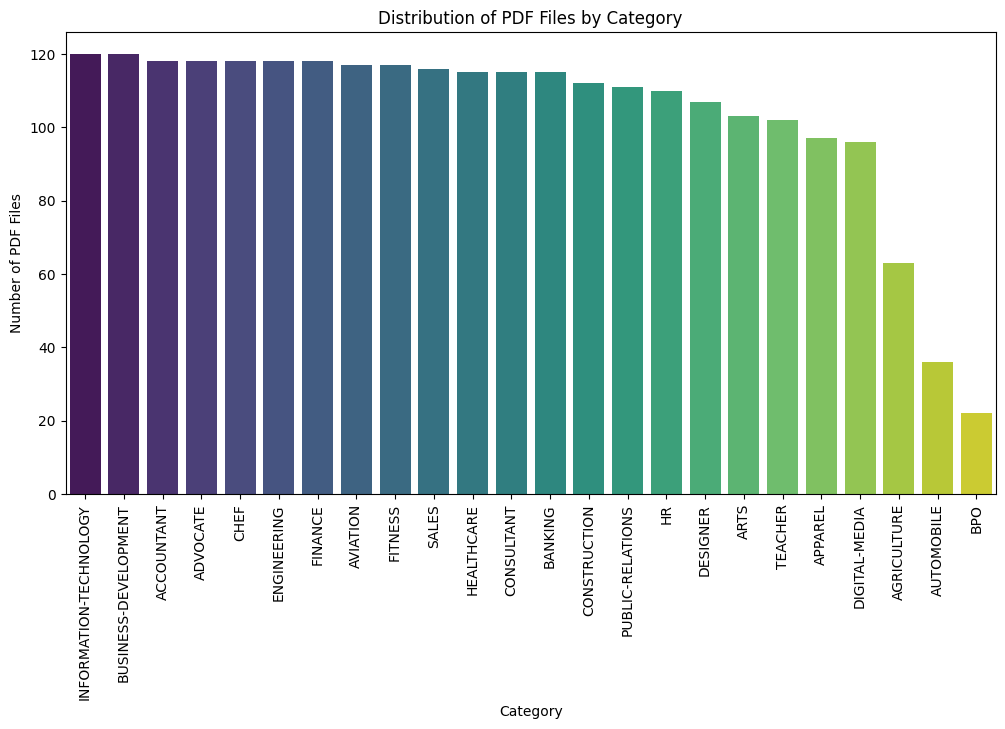

In [6]:

# Plot the distribution of PDFs by category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of PDF Files by Category")
plt.xlabel("Category")
plt.ylabel("Number of PDF Files")
plt.show()


Resume CSV EDA

In [7]:

# Load the Resume CSV file
resume_df = pd.read_csv(resume_csv_path)

# Show basic information about the dataset
print(resume_df.info())
# Show sample rows from the dataset
print(resume_df.head())

# EDA: Check for missing values
missing_values = resume_df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")
# EDA: Count the number of resumes per category
resume_counts = resume_df['Category'].value_counts()
print(f"Number of resumes per category:\n{resume_counts}")

# EDA: Analyze the length of resumes (based on the text)
resume_df['Resume Length'] = resume_df['Resume_str'].apply(lambda x: len(str(x)))
print(resume_df[['ID', 'Resume Length', 'Category']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB
None
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  

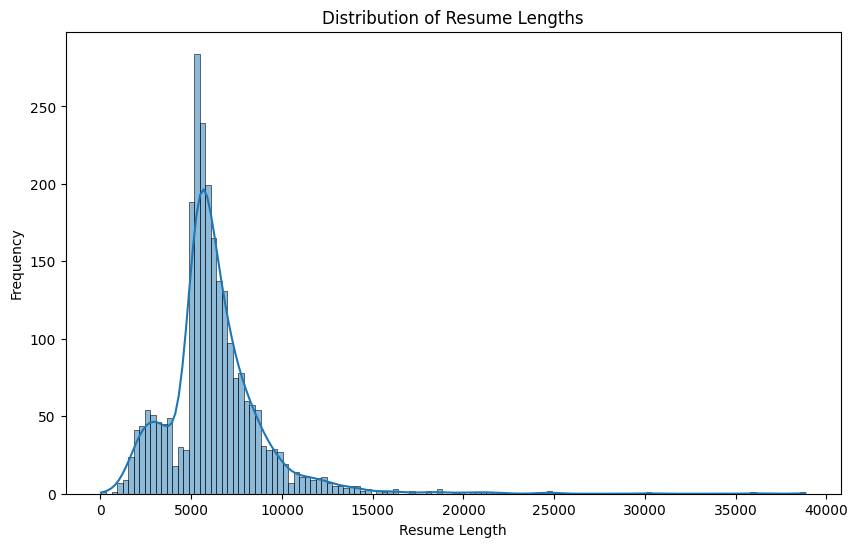

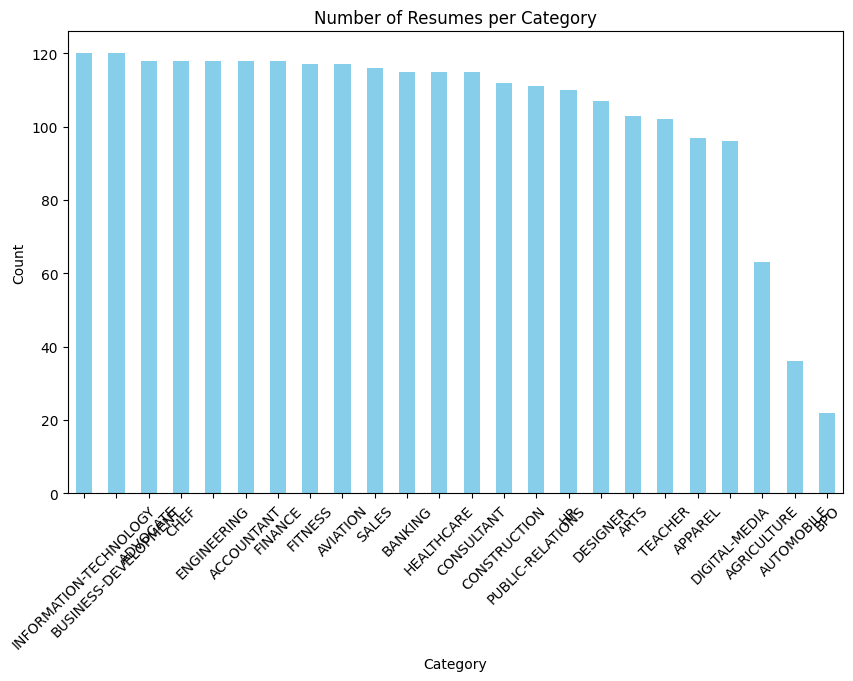

In [8]:

# Plot the distribution of resume lengths
plt.figure(figsize=(10, 6))
sns.histplot(resume_df['Resume Length'], kde=True)
plt.title("Distribution of Resume Lengths")
plt.xlabel("Resume Length")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of resumes across categories
plt.figure(figsize=(10, 6))
resume_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Resumes per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()